In [1]:
# imports
import market_status as ms
from IPython.display import display, Markdown, Javascript, display_html
import pandas as pd
import datetime as dt
import os
import time

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- Recent IPOs (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Add small cheatsheet what to look for with each notebook section

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>24/12/2021</td>
<td>Friday</td>
<td>-</td>
</tr>
<tr>
<td>17/01/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>21/02/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>15/04/2022</td>
<td>Friday</td>
<td>-</td>
</tr>
<tr>
<td>30/05/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>20/06/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>04/07/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>05/09/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

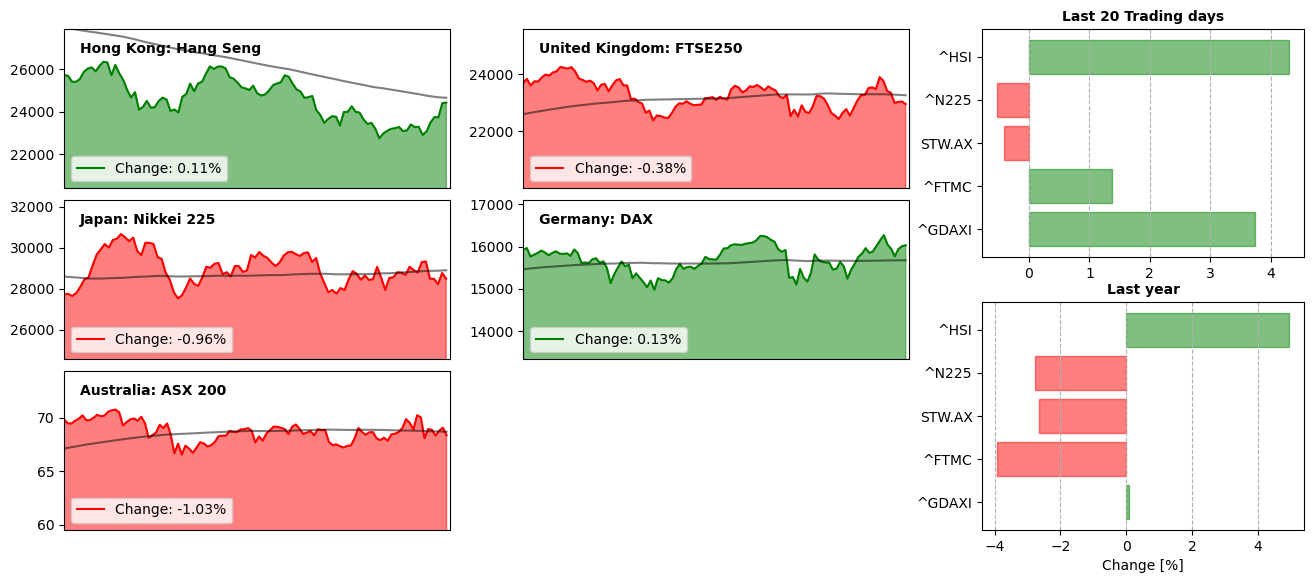

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000
<br>
Follow the price action. How is the price and volume evolving? Any clear support or resistance soon? How is the new highs/new lows indicator acting compared to the overall market?

Last update done: 14-01-2022 at 08:17:57


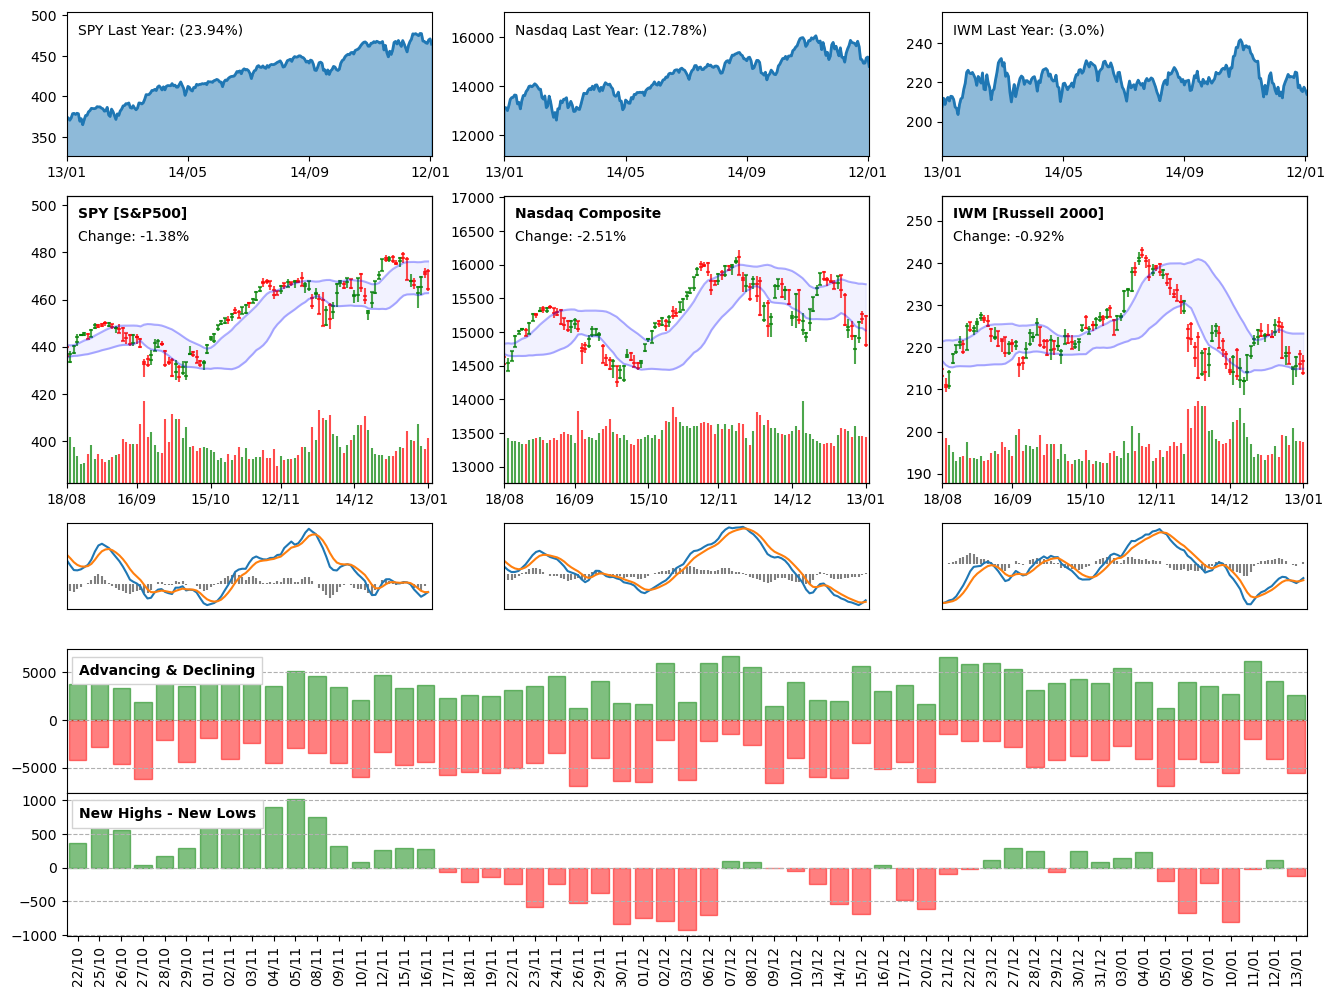

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

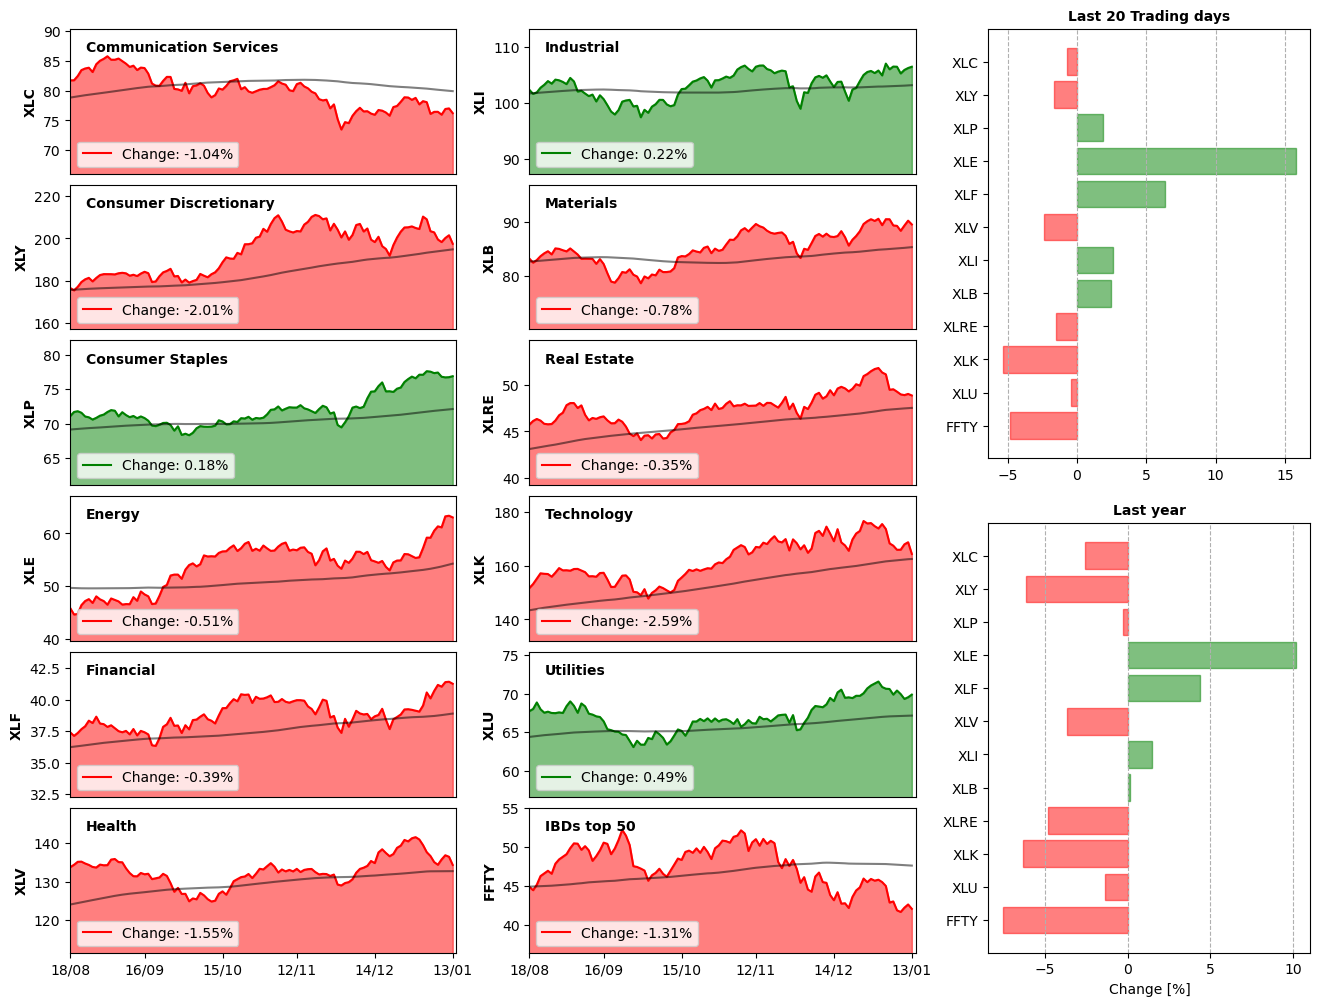

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month.
<br>
Any industry shows relative strength compared to rest of the market? This could be potential winner for next cycle.

In [5]:
ind = ms.industries(sf=False, rank=True)
display_html(ind.prettify(ind.table.iloc[:20,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Coking Coal,8.69,31.79,80.51,82.35,0.61,-1.99,0.00
Oil & Gas Drilling,2.37,21.70,15.38,27.13,0.63,-1.19,0.00
Oil & Gas E&P,4.83,18.33,45.39,80.04,0.80,-1.00,23.00
Oil & Gas Equipment & Services,4.75,17.71,21.98,20.86,0.99,-0.50,10.00
Aluminum,7.01,17.34,19.02,73.15,0.68,-2.37,0.00
Oil & Gas Refining & Marketing,4.88,16.25,17.60,26.39,0.83,-0.23,19.00
Copper,9.20,15.52,21.81,15.92,1.23,-1.71,5.00
Other Industrial Metals & Mining,7.71,14.83,-6.42,-3.92,0.94,-0.73,1.00
Marine Shipping,3.11,14.71,22.49,60.20,0.87,-0.86,74.00
Airlines,4.46,13.52,1.13,1.09,1.37,1.99,50.00


In [6]:
display_html(ind.prettify(ind.table.iloc[-10:,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Health Information Services,-4.58,-8.26,-25.26,-33.57,0.91,-3.33,-4.00
Pollution & Treatment Controls,-6.47,-8.27,-5.53,-1.92,0.32,-1.97,-13.00
Software - Infrastructure,-2.49,-8.33,-0.81,20.48,0.93,-4.09,-4.00
Trucking,-5.65,-8.65,11.58,36.13,0.57,-1.75,-13.00
Electrical Equipment & Parts,-3.04,-8.73,-1.64,-23.71,0.58,-1.67,2.00
Footwear & Accessories,-6.63,-9.36,-6.38,6.83,0.93,-1.80,-8.00
Software - Application,-3.38,-10.53,-11.32,-12.07,0.78,-4.79,-1.00
Biotechnology,-4.69,-12.13,-21.68,-28.45,0.64,-3.39,-4.00
Electronic Gaming & Multimedia,-3.10,-12.38,-27.40,-25.62,1.20,-6.33,0.00
Solar,-0.23,-18.19,-11.87,-41.15,0.94,-2.56,0.00


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [7]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

,Day [%],Week [%],Month [%],Quarter [%]
Natural Gas,-0.87,8.09,12.97,-25.57
Crude Oil WTI,0.04,4.12,16.15,1.03
Crude Oil Brent,0.26,3.60,14.91,0.82
Ethanol,2.78,2.78,-10.48,-4.72
Palladium,-0.63,-2.27,15.73,-12.69
Copper,-0.35,2.72,6.40,-2.19
Platinum,0.59,2.24,7.36,-7.07
Silver,0.25,3.62,5.91,-1.09
Gold,0.31,1.65,3.09,1.62
Lumber,3.50,8.23,19.27,75.26


***
## **Crypto**

In [8]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **Finviz screeners**
Following tables are results from pre-defined finviz screeners
<br><br>
**New high Breakouts** - [[Link]](https://finviz.com/screener.ashx?v=211&s=ta_newhigh&f=ind_stocksonly,sh_avgvol_o100,sh_float_o5,sh_relvol_o1)
<br>
Stocks with new 52 week highs, with float over 5M shares, average volume 100k and relative volume over 1. 

In [9]:
screeners = ms.screeners()
nh = screeners.newhighs()
screeners.prettify(nh)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
FLNG,TSM,NXST,HBNC,ECPG,ICL,BPOP,BRX,TM,CBZ,BPMP,TOWN,MTB,KLAC,EPC
PBR,F,HSBC,AMAT,KR,FHB,EVA,THRM,TECK,BTI,TFC,SCHL,MTG,CNOB,HAL
NEX,FLO,NWG,PNFP,HES,CFG,ACBI,RFP,BCS,BNS,KDP,PECO,CNQ,KEY,LYG
BP,FULT,FAF,LKFN,NI,BANR,PCG,EGBN,EQNR,NTRS,WFC,MBI,AEG,CPG,TRTN
WAFD,PXD,FITB,WFG,INGR,VLY,ARLP,WES,TSN,USB,MRO,VET,UBS,MCB,WPP
CMA,AEL,SNV,HUN,CFR,WRB,SLB,RRD,IMO,L,EWBC,ZIM,CM,PNC,KIM
FNF,RTX,BCE,BK,,,,,,,,,,,


**50 day high with fundamentals** - [[Link]](https://finviz.com/screener.ashx?v=211&f=fa_debteq_u1,fa_eps5years_o10,fa_sales5years_o10,ind_stocksonly,sh_avgvol_o100,sh_float_o5,sh_relvol_o1,ta_highlow50d_nh)
<br>
Stocks which have 50 day highs with higher relative volume and basic fundamental filtration (dept/equity <1, sales and EPS growth in last 5 years larger than 10%)

In [10]:
fd = screeners.fiftyday()
screeners.prettify(fd)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
KBH,TSM,CBZ,KLAC,AMAT,PHM,KDP,PECO,MCB,MKSI,,,,,


In [11]:
# save the screener results into xlsx
with pd.ExcelWriter("Data/Screeners/NH"+str(dt.date.today().strftime("%Y-%m"))+".xlsx", mode="a") as writer:
    nh.to_excel(writer, sheet_name=dt.date.today().strftime("%Y-%m-%d"))
with pd.ExcelWriter("Data/Screeners/FD"+str(dt.date.today().strftime("%Y-%m"))+".xlsx", mode="a") as writer:
    fd.to_excel(writer, sheet_name=dt.date.today().strftime("%Y-%m-%d"))

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
## **Other resources**

List of other good resources to check (these will be hopefully implemented into this notebook later)

1. [Market momentum](https://www.barchart.com/stocks/momentum) - Watch for the number of stocks which are declining and advancing and overall number of new highs/new lows
2. [SPY p/c ratio](https://www.barchart.com/etfs-funds/quotes/SPY/put-call-ratios) - P/C ratio >1 = bearish


In [12]:
os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

0